Taken from: https://colab.research.google.com/drive/1E2RViy7xmor0mhqskZV14_NUj2jMpJz3?authuser=1#scrollTo=9AdpFVfy6ya9

In [1]:
#import libraries
import numpy as np
import time
from datetime import datetime
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#define the shape of the environment (i.e., its states)
environment_rows = 11
environment_columns = 11

#Create a 3D numpy array to hold the current Q-values for each state and action pair: Q(s, a)
#The array contains 11 rows and 11 columns (to match the shape of the environment), as well as a third "action" dimension.
#The "action" dimension consists of 4 layers that will allow us to keep track of the Q-values for each possible action in
#each state (see next cell for a description of possible actions).
#The value of each (state, action) pair is initialized to 0.
q_m = np.zeros((environment_rows, environment_columns, 4))
# q_values = np.random.randint(5, size = (11, 11))
q_m

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
      

In [3]:
q_m[(5,3)]

array([0., 0., 0., 0.])

#### Actions
The actions that are available to the AI agent are to move the robot in one of four directions:
* Up
* Right
* Down
* Left

Obviously, the AI agent must learn to avoid driving into the item storage locations (e.g., shelves)!


In [4]:
#define actions
#numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

#### Rewards
The last component of the environment that we need to define are the **rewards**.

To help the AI agent learn, each state (location) in the warehouse is assigned a reward value.

The agent may begin at any white square, but its goal is always the same: ***to maximize its total rewards***!

Negative rewards (i.e., **punishments**) are used for all states except the goal.
* This encourages the AI to identify the *shortest path* to the goal by *minimizing its punishments*!

To maximize its cumulative rewards (by minimizing its cumulative punishments), the AI agent will need find the shortest paths between the item packaging area (green square) and all of the other locations in the warehouse where the robot is allowed to travel (white squares). The agent will also need to learn to avoid crashing into any of the item storage locations (black squares)!

In [5]:
# #Create a 2D numpy array to hold the rewards for each state.
# #The array contains 11 rows and 11 columns (to match the shape of the environment), and each value is initialized to -100.
# rewards = np.full((environment_rows, environment_columns), -100.)
# rewards[0, 5] = 100. #set the reward for the packaging area (i.e., the goal) to 100

# #define aisle locations (i.e., white squares) for rows 1 through 9
# aisles = {} #store locations in a dictionary
# aisles[1] = [i for i in range(1, 10)]
# aisles[2] = [1, 7, 9]
# aisles[3] = [i for i in range(1, 8)]
# aisles[3].append(9)
# aisles[4] = [3, 7]
# aisles[5] = [i for i in range(11)]
# aisles[6] = [5]
# aisles[7] = [i for i in range(1, 10)]
# aisles[8] = [3, 7]
# aisles[9] = [i for i in range(11)]

# #set the rewards for all aisle locations (i.e., white squares)
# for row_index in range(1, 10):
#   for column_index in aisles[row_index]:
#     rewards[row_index, column_index] = -1.

# #print rewards matrix
# for row in rewards:
#   print(row)

In [6]:
# rewards

Alternate env

In [7]:
#Create a 2D numpy array to hold the rewards for each state.
#The array contains 11 rows and 11 columns (to match the shape of the environment), and each value is initialized to -100.
rewards = np.full((environment_rows, environment_columns), -100.)
# rewards[0, 5] = 100. #set the reward for the packaging area (i.e., the goal) to 100
rewards[1, 0] = 100. #set the reward for the packaging area (i.e., the goal) to 100
rewards[6, 0] = 40. # Set sub-optimal reward


#define aisle locations (i.e., white squares) for rows 1 through 9
aisles = {} #store locations in a dictionary
aisles[0] = [i for i in range(0, 9)]
aisles[1] = [8, 10]
aisles[2] = [i for i in range(0, 7)]
aisles[2].append(8)
aisles[2].append(10)
aisles[3] = [i for i in range(6, 11)]
aisles[4] = [i for i in range(1, 5)]
aisles[4].append(6)
aisles[5] = [2, 4, 6, 7, 8, 9]
aisles[6] = [2, 4, 6]
aisles[7] = [0, 1, 2, 4, 6, 7, 8, 9, 10]
aisles[8] = [4, 10]
aisles[9] = [i for i in range(11)]

#set the rewards for all aisle locations (i.e., white squares)
for row_index in range(0, 10):
  for column_index in aisles[row_index]:
    rewards[row_index, column_index] = -1.

# Add puddles (penalties)
rewards[2, 4] = -40
rewards[4, 3] = -20

# #print rewards matrix
# for row in rewards:
#   print(row)
pd.DataFrame(rewards)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-100.0,-100.0
1,100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-1.0,-100.0,-1.0
2,-1.0,-1.0,-1.0,-1.0,-40.0,-1.0,-1.0,-100.0,-1.0,-100.0,-1.0
3,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-100.0,-1.0,-1.0,-20.0,-1.0,-100.0,-1.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,-100.0,-1.0,-100.0,-1.0,-100.0,-1.0,-1.0,-1.0,-1.0,-100.0
6,40.0,-100.0,-1.0,-100.0,-1.0,-100.0,-1.0,-100.0,-100.0,-100.0,-100.0
7,-1.0,-1.0,-1.0,-100.0,-1.0,-100.0,-1.0,-1.0,-1.0,-1.0,-1.0
8,-100.0,-100.0,-100.0,-100.0,-1.0,-100.0,-100.0,-100.0,-100.0,-100.0,-1.0
9,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [8]:
rewards[8, 0]

-100.0

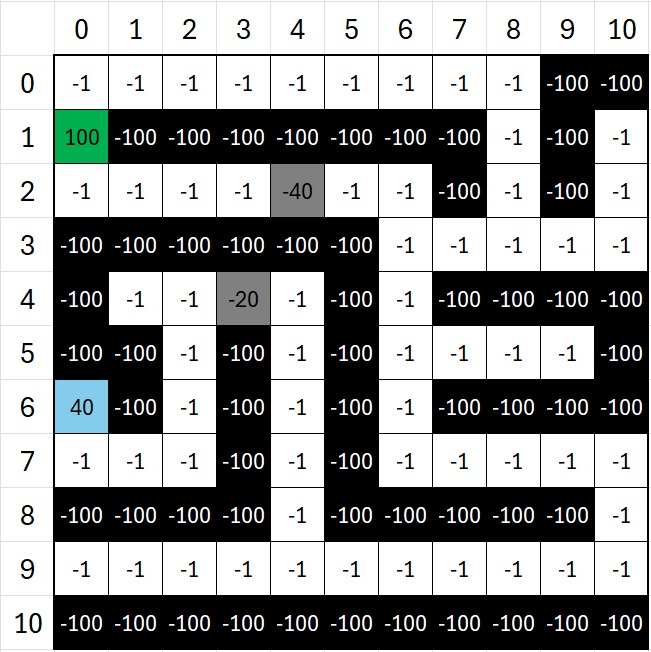

# Train the Model
Our next task is for our AI agent to learn about its environment by implementing a Q-learning model. The learning process will follow these steps:
1. Choose a random, non-terminal state (white square) for the agent to begin this new episode.
2. Choose an action (move *up*, *right*, *down*, or *left*) for the current state. Actions will be chosen using an *epsilon greedy algorithm*. This algorithm will usually choose the most promising action for the AI agent, but it will occasionally choose a less promising option in order to encourage the agent to explore the environment.
3. Perform the chosen action, and transition to the next state (i.e., move to the next location).
4. Receive the reward for moving to the new state, and calculate the temporal difference.
5. Update the Q-value for the previous state and action pair.
6. If the new (current) state is a terminal state, go to #1. Else, go to #2.

This entire process will be repeated across 1000 episodes. This will provide the AI agent sufficient opportunity to learn the shortest paths between the item packaging area and all other locations in the warehouse where the robot is allowed to travel, while simultaneously avoiding crashing into any of the item storage locations!

In [9]:
# Number of white squares
sum(rewards == -1).sum()

59

## Define Helper Functions

In [10]:
#define a function that determines if the specified location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
  """
  This function is to determine whether the current state is a state which will terminate the game or not.
  If this function returns True, then it will terminate the game.
  Landing on a white square continues the game, while landing on a black or the green square will terminate it.
  """
  if rewards[current_row_index, current_column_index] == -1.: # Falling on white
    return False
  else: # Falling on green or black
    return True

#define a function that will choose a random, non-terminal starting location
def get_starting_location(row = None, col = None):
  current_row_index = np.random.randint(environment_rows) if row is None else row
  current_column_index = np.random.randint(environment_columns) if col is None else col

  # # get a random row and column index
  # current_row_index = np.random.randint(environment_rows)
  # current_column_index = np.random.randint(environment_columns)

  # # Get specific row and column
  # current_row_index = 9
  # current_column_index = 10

  #continue choosing random row and column indexes until a non-terminal state is identified
  #(i.e., until the chosen state is a 'white square').
  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
  return current_row_index, current_column_index

# Epsilon greedy policy
def eps_greedy(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon,
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() < epsilon:
    return np.random.randint(4)
  else: #choose a random action
    return np.argmax(q_m[current_row_index, current_column_index])

# Random policy
def random_pol(current_row_index, current_column_index):
  return np.random.randint(4)

# Botlzmann policy (ref: https://github.com/8Gitbrix/Reinforcement-Learning/blob/master/qlearn.py and https://automaticaddison.com/boltzmann-distribution-and-epsilon-greedy-search/)
def boltz_policy(current_row_index, current_column_index, tau):
    if tau > 0:
      p = np.array([q_m[current_row_index, current_column_index, x]/tau for x in range(4)], dtype=np.float128)
      prob_actions = np.exp(p) / np.sum(np.exp(p))
      cumulative_probability = 0.0
      choice = random.uniform(0,1)
      for a,pr in enumerate(prob_actions):
          cumulative_probability += pr
          if cumulative_probability > choice:
              return a
    else:
      return np.argmax(q_m[current_row_index, current_column_index])


# Transition function
def get_next_location(current_row_index, current_column_index, action_index):
  """
  This will instruct how the agent will move. As long as the agent is not near one of the four walls, it can move about freely.
  The moment it is against a wall, it will not be able to move beyond it, and the next location will be the same as the current
  location.
  """
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index

#Define a function that will get the shortest path between any location within the warehouse that
#the robot is allowed to travel and the item packaging location.
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: #if this is a 'legal' starting location
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not is_terminal_state(current_row_index, current_column_index):

      # Choose policy
      action_index = eps_greedy(current_row_index, current_column_index, .0) # Epsilon greedy policy
      # action_index = boltz_policy(row_index, column_index, tau) # Boltzmann policy
      # action_index = random_pol(row_index, column_index) # Random policy

      #move to the next location on the path, and add the new location to the list
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
      # print(current_row_index, current_column_index)
    return shortest_path

In [11]:
# #display a few shortest paths
# start = time.time()
# print(f"Optimal path finding started: {datetime.fromtimestamp(start)}")

# print(f"\nPath: {get_shortest_path(0, 8)} (Moves: {len(get_shortest_path(3, 9))})") #starting at row 3, column 9
# print(f"\nPath: {get_shortest_path(5, 9)} (Moves: {len(get_shortest_path(5, 0))})") #starting at row 5, column 0
# print(f"\nPath: {get_shortest_path(9, 10)} (Moves: {len(get_shortest_path(9, 5))})") #starting at row 9, column 5

# end = time.time()
# print(f"\nOptimal path finding ended: {datetime.fromtimestamp(end)}")
# elapsed_time = end - start
# print(f"Elapsed time: {np.round(elapsed_time/60, 3)} minutes\n")

We can see before training, in this particular starting positions, the agent takes very long to converge, hence we had to interrupt it half way.

After training however, the agent manages to get there instantly

## Train the AI Agent using Q-Learning

In [12]:
# #define training parameters
# epsilon = [0.1, 0.5, 0.9] # exploration
# max_epsilon = 1
# min_epsilon = 0.01
# epsilon_decay_rate = [0.1, 0.5, 0.9] # If you go beyond 1 it will make epsilon go to inf
# discount_factor = [0.1, 0.5, 0.9] #discount factor for future rewards
# learning_rate = [0.1, 0.5, 0.9] #the rate at which the AI agent should learn
# training_episodes = 1000
# tau = 5 # This is temperature for blotzmann policy. Higher tau means more equal probability of taking an action. Lower tau is choosing the more likelier class

# param_search_q_values = []
# param_search_episodes = []
# param_search_steps = []
# param_search_params = []
# param_index = []

# for param_i, param in enumerate(epsilon):
#   q_values = []
#   episodes = []
#   steps = []
#   q_m = np.zeros((environment_rows, environment_columns, 4))

#   #run through training episodes
#   for episode in range(training_episodes):
#     # Define starting location. Keep it empty to randomise start location during training
#     row_index, column_index = get_starting_location()
#     step = 0

#     #continue taking actions (i.e., moving) until we reach a terminal state
#     #(i.e., until we reach the item packaging area or crash into an item storage location)
#     while not is_terminal_state(row_index, column_index):

#       # Choose the policy
#       action_index = eps_greedy(row_index, column_index, param) # Epsilon greedy policy
#       # action_index = boltz_policy(row_index, column_index, tau) # Boltzmann policy
#       # action_index = random_pol(row_index, column_index) # Random policy

#       # Decay the epsilon rate linearly
#       if param > 0.01:
#         param *= epsilon_decay_rate[-1]

#       # # Temp decay
#       # if tau > 0.1:
#       #   tau -= 0.5

#       # # Decay the epsilon rate exponentially based on minimum and max values
#       # epsilon = min_epsilon/((max_epsilon-min_epsilon)*np.exp(-epsilon_decay_rate[-1])) # https://medium.com/@nancyjemi/level-up-understanding-q-learning-cf739867eb1d
#       # # epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-1. * episode / epsilon_decay_rate[-1]) # Non-lienar decay

#       #perform the chosen action, and transition to the next state (i.e., move to the next location)
#       old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
#       row_index, column_index = get_next_location(row_index, column_index, action_index)

#       # Bellman's equation: Q[s_old,a] + alpha*(R[s_old,a] + gamma*(max(Q[s])) - Q[s_old,a])
#       q_m[old_row_index, old_column_index, action_index] = q_m[old_row_index, old_column_index, action_index] + learning_rate[-1]*(rewards[row_index, column_index] + discount_factor[-1]*(np.max(q_m[row_index, column_index]) - q_m[old_row_index, old_column_index, action_index]))
#       print(f"\nAction taken: Go {actions[action_index]} (index = {action_index})\nMoving from {old_row_index, old_column_index} to {row_index, column_index} with reward {rewards[row_index, column_index]}")
#       print(f"Q value is: {q_m[old_row_index, old_column_index, action_index]}")
#       q_values.append(q_m[old_row_index, old_column_index, action_index])
#       episodes.append(episode)
#       step += 1
#       steps.append(step)

#       # print(f"\nQ matrix for going {actions[action_index]} is:\n {q_values[:, :, action_index]}")
#       # #receive the reward for moving to the new state, and calculate the temporal difference
#       # reward = rewards[row_index, column_index]
#       # old_q_value = q_values[old_row_index, old_column_index, action_index]
#       # temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

#       # #update the Q-value for the previous state and action pair
#       # new_q_value = old_q_value + (learning_rate * temporal_difference)
#       # q_values[old_row_index, old_column_index, action_index] = new_q_value
#     param_search_q_values.append(q_values)
#     param_search_episodes.append(episodes)
#     param_search_steps.append(steps)
#     param_search_params.append(param)
#     param_index.append(param_i)

#   print(f"\nTraining complete for {training_episodes} training episodes!")




numeric action codes: 0 = up, 1 = right, 2 = down, 3 = left

In [13]:
# pd.DataFrame(param_search_steps[100])

The reason that the q matrix is 3D, is that the 3rd dimension contains the q values for each action at any given point.

For example at (2,0), going up (action = 0) has a q value of 100, which makes sense because going up from (2,0) will win the game.

So then we look at the q matrix corresponding to action = 0, from the 4 actions. This means we access the q matrix that corresponds to action = 0 from the 4 matrices in the 3rd dimension of q_values. Here we will see that (2,0) has a q value of 100, nudging the agent to move upwards (take action = 0).

In [14]:
# Individual param testing
epsilon = 0.9 # exploration
max_epsilon = 1
min_epsilon = 0.01
epsilon_decay_rate = 0.9 # If you go beyond 1 it will make epsilon go to inf
discount_factor = 0.1 #discount factor for future rewards (gamma)
learning_rate = 0.9 #the rate at which the AI agent should learn (alpha)
training_episodes = 1000
tau = 0.1 # This is temperature for blotzmann policy. Higher tau means more equal probability of taking an action. Lower tau is choosing the more likelier class

q_values = []
episodes = []
steps = []

#run through training episodes
for episode in range(training_episodes):
  # Define starting location. Keep it empty to randomise start location during training
  row_index, column_index = get_starting_location()
  step = 0

  #continue taking actions (i.e., moving) until we reach a terminal state
  #(i.e., until we reach the item packaging area or crash into an item storage location)
  while not is_terminal_state(row_index, column_index):

    # Choose the policy
    action_index = eps_greedy(row_index, column_index, epsilon) # Epsilon greedy policy
    # action_index = boltz_policy(row_index, column_index, tau) # Boltzmann policy
    # action_index = random_pol(row_index, column_index) # Random policy

    # # Decay the epsilon rate linearly
    # if epsilon > 0.01:
    #   epsilon *= epsilon_decay_rate

    # # Temp decay
    # if tau > 1.:
    #   tau -= 0.1

    # Decay the epsilon rate exponentially based on minimum and max values
    epsilon = min_epsilon/((max_epsilon-min_epsilon)*np.exp(-epsilon_decay_rate)) # https://medium.com/@nancyjemi/level-up-understanding-q-learning-cf739867eb1d
    # epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-1. * episode / epsilon_decay_rate) # Non-lienar decay

    #perform the chosen action, and transition to the next state (i.e., move to the next location)
    old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
    row_index, column_index = get_next_location(row_index, column_index, action_index)

    # Bellman's equation: Q[s_old,a] + alpha*(R[s_old,a] + gamma*(max(Q[s])) - Q[s_old,a])
    q_m[old_row_index, old_column_index, action_index] = q_m[old_row_index, old_column_index, action_index] + learning_rate*(rewards[row_index, column_index] + discount_factor*(np.max(q_m[row_index, column_index]) - q_m[old_row_index, old_column_index, action_index]))
    print(f"\nAction taken: Go {actions[action_index]} (index = {action_index})\nMoving from {old_row_index, old_column_index} to {row_index, column_index} with reward {rewards[row_index, column_index]}")
    print(f"Q value is: {q_m[old_row_index, old_column_index, action_index]}")
    q_values.append(q_m[old_row_index, old_column_index, action_index])
    episodes.append(episode)
    step += 1
    steps.append(step)

    # print(f"\nQ matrix for going {actions[action_index]} is:\n {q_values[:, :, action_index]}")
    # #receive the reward for moving to the new state, and calculate the temporal difference
    # reward = rewards[row_index, column_index]
    # old_q_value = q_values[old_row_index, old_column_index, action_index]
    # temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

    # #update the Q-value for the previous state and action pair
    # new_q_value = old_q_value + (learning_rate * temporal_difference)
    # q_values[old_row_index, old_column_index, action_index] = new_q_value

print(f"\nTraining complete for {training_episodes} training episodes!")

Streaming output truncated to the last 5000 lines.
Moving from (0, 2) to (0, 1) with reward -1.0
Q value is: 979.9999999999982

Action taken: Go left (index = 3)
Moving from (0, 1) to (0, 0) with reward -1.0
Q value is: 989.9999999999987

Action taken: Go down (index = 2)
Moving from (0, 0) to (1, 0) with reward 100.0
Q value is: 999.9999999999993

Action taken: Go left (index = 3)
Moving from (7, 8) to (7, 7) with reward -1.0
Q value is: 708.7857739213772

Action taken: Go left (index = 3)
Moving from (7, 7) to (7, 6) with reward -1.0
Q value is: 775.7414237570148

Action taken: Go up (index = 0)
Moving from (7, 6) to (6, 6) with reward -1.0
Q value is: 814.611983474748

Action taken: Go up (index = 0)
Moving from (6, 6) to (5, 6) with reward -1.0
Q value is: 836.2190157288333

Action taken: Go up (index = 0)
Moving from (5, 6) to (4, 6) with reward -1.0
Q value is: 849.2999036919308

Action taken: Go up (index = 0)
Moving from (4, 6) to (3, 6) with reward -1.0
Q value is: 859.8171081

In [15]:
results = pd.DataFrame([q_values, episodes, steps], index = ["q_values", "episodes", "steps"]).T

results_grouped_episodes = results.groupby(by = ["episodes"]).mean().reset_index()
results_grouped_episodes

,episodes,q_values,steps
0,0.0,44.550000,1.5
1,1.0,-18.720000,3.0
2,2.0,-90.000000,1.0
3,3.0,-23.175000,2.5
4,4.0,-45.450000,1.5
...,...,...,...
995,995.0,277.874035,1.5
996,996.0,293.182255,4.0
997,997.0,463.842136,20.0
998,998.0,337.188428,3.5


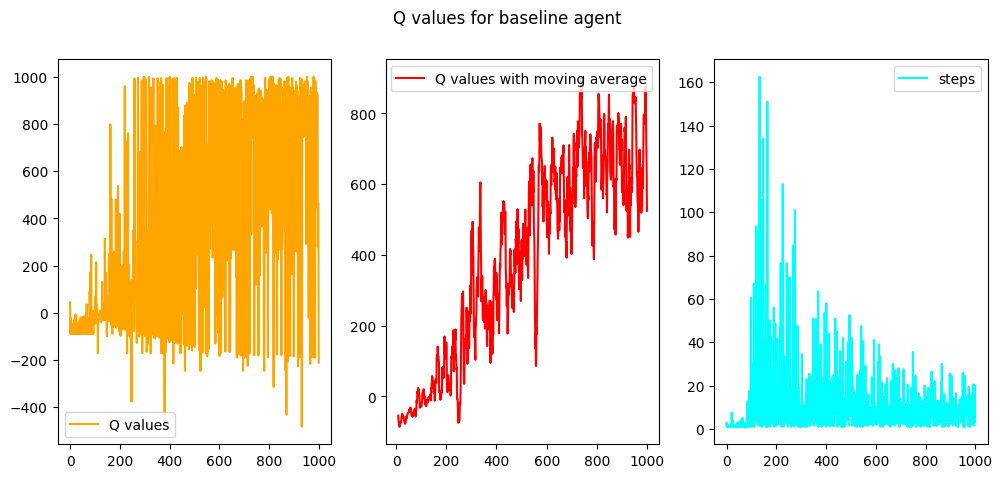

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

window_size = 10  # Adjust the window size as needed
rolling_avg_scores = np.convolve(results_grouped_episodes['q_values'], np.ones(window_size)/window_size, mode='valid')

fig, ax = plt.subplots(1, 3, figsize=(12, 5))
fig.suptitle("Q values for baseline agent")
ax[0].plot(results_grouped_episodes["episodes"], results_grouped_episodes['q_values'], label = "Q values", color = "orange")
ax[1].plot(range(training_episodes)[window_size - 1:], rolling_avg_scores, label = "Q values with moving average", color = "red")
ax[2].plot(results_grouped_episodes["episodes"], results_grouped_episodes['steps'], label = "steps", color = "cyan")
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

# Test run

In [17]:
# epsilon
tau

0.1

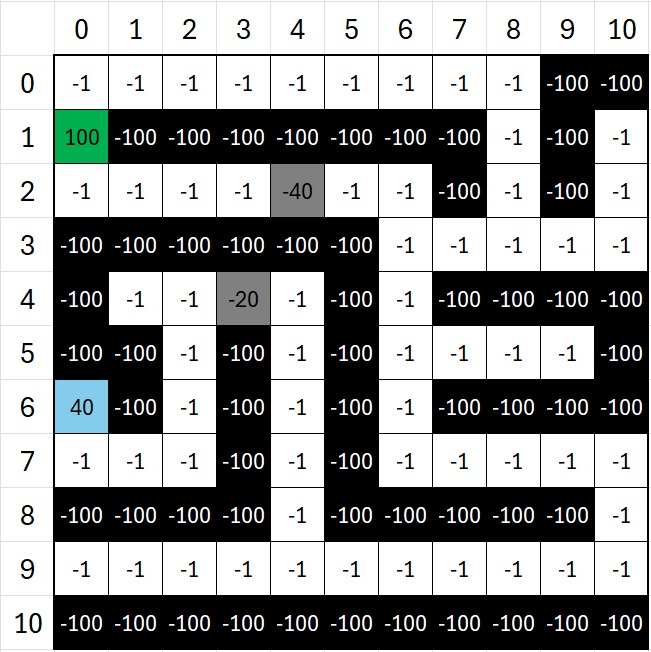

Optimal path finding started: 2024-05-12 14:42:25.378140


Path: [[9, 10], [8, 10], [7, 10], [7, 9], [7, 8], [7, 7], [7, 6], [6, 6], [5, 6], [4, 6], [3, 6], [3, 7], [3, 8], [2, 8], [1, 8], [0, 8], [0, 7], [0, 6], [0, 5], [0, 4], [0, 3], [0, 2], [0, 1], [0, 0], [1, 0]] (Moves: 25)

Optimal path finding ended: 2024-05-12 14:42:25.378968
Elapsed time: 0.0 minutes



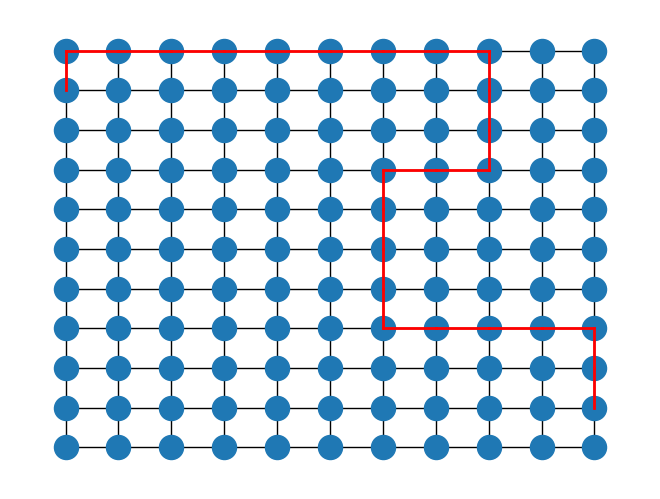

In [18]:
# get_starting_location()

start = time.time()
print(f"Optimal path finding started: {datetime.fromtimestamp(start)}\n")

# Starting location
# Interesting starting locations: 9,4 | 3,8 | 5,9 | 9,10 | 1,10
# row, col = 9,10
row, col = get_starting_location(9,10)
shortest_path_result = get_shortest_path(row, col)
print()
print(f"Path: {shortest_path_result} (Moves: {len(shortest_path_result)})\n") #starting at row 3, column 9

end = time.time()
print(f"Optimal path finding ended: {datetime.fromtimestamp(end)}")
elapsed_time = end - start
print(f"Elapsed time: {np.round(elapsed_time/60, 3)} minutes\n")

# Draw path

# Define the size of the grid
n = 11
# Create a grid graph
G = nx.grid_2d_graph(n, n)
# Set the position of the nodes using the node coordinates
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw(G, pos=pos, node_size=300, with_labels=False)

# Define the coordinates of the boxes you want the line to go through
# coords = [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]
coords = [tuple(x) for x in shortest_path_result] # https://stackoverflow.com/questions/5506511/python-converting-list-of-lists-to-tuples-of-tuples

# Draw the line through the specified coordinates
for i in range(len(coords) - 1):
    x1, y1 = coords[i]
    x2, y2 = coords[i + 1]
    plt.plot([y1, y2], [-x1, -x2], 'r-', linewidth=2)
# Set the x and y axis ticks
# plt.xticks(range(n), [str(i) for i in range(n)])  # Column indices
# plt.yticks(range(-n, 0), [str(-i) for i in range(n)])  # Row indices
plt.show()

In [19]:
# get_shortest_path(row, col)

In [20]:
# Save results to csv
results_grouped_episodes

,episodes,q_values,steps
0,0.0,44.550000,1.5
1,1.0,-18.720000,3.0
2,2.0,-90.000000,1.0
3,3.0,-23.175000,2.5
4,4.0,-45.450000,1.5
...,...,...,...
995,995.0,277.874035,1.5
996,996.0,293.182255,4.0
997,997.0,463.842136,20.0
998,998.0,337.188428,3.5
